# Session 2 Highlights

### A Linear Model

$y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$

### An objective function 

$SSR(\beta_0,\beta_1) = \sum_i \epsilon_i^2=\sum_i \left(y_i-\beta_0 - \beta_1 \cdot x_i\right)^2$

Minimize $SSR(\beta_0,\beta_1)$ with respect to $\beta_0,\beta_1$

### In words

Choose $\hat\beta_0$ and $\hat\beta_1$ such that $SSR(\hat\beta_0, \hat\beta_1$) is minimized.

### In equations

$\hat\beta_1 = \displaystyle{\frac{\sum_i(y_i-\overline{y})(x_i-\overline{x})}{\sum_i(x_i-\overline{x})^2} = \frac{Cov(x,y)}{Var(x)}}$

$\hat\beta_0 = \overline{y} - \hat\beta_1 \cdot \overline{x}$

### A predictor

Given $\hat\beta_0$ and $\hat\beta_1$, a predictor of $y_i$ is $\hat y_i = \hat\beta_0 + \hat\beta_1 \cdot x_i$

This is true for our in-sample or training data, $x_i$.  This is also true for our out-of-sample or test data, $x_j$.

### A valid real-world application

CAPM

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')

start, end = dt.datetime(2006, 1, 1), dt.datetime(2016, 12, 31)
aapl_all = web.DataReader('aapl', 'yahoo', start, end)
nasdaq_all = web.DataReader('^ixic', 'yahoo', start, end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.head()
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

Populating the interactive namespace from numpy and matplotlib
                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2114.
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:36:42   Log-Likelihood:                 7541.1
No. Observations:                2768   AIC:                        -1.508e+04
Df Residuals:                    2766   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------

### A visual representation

(-0.1, 0.1)

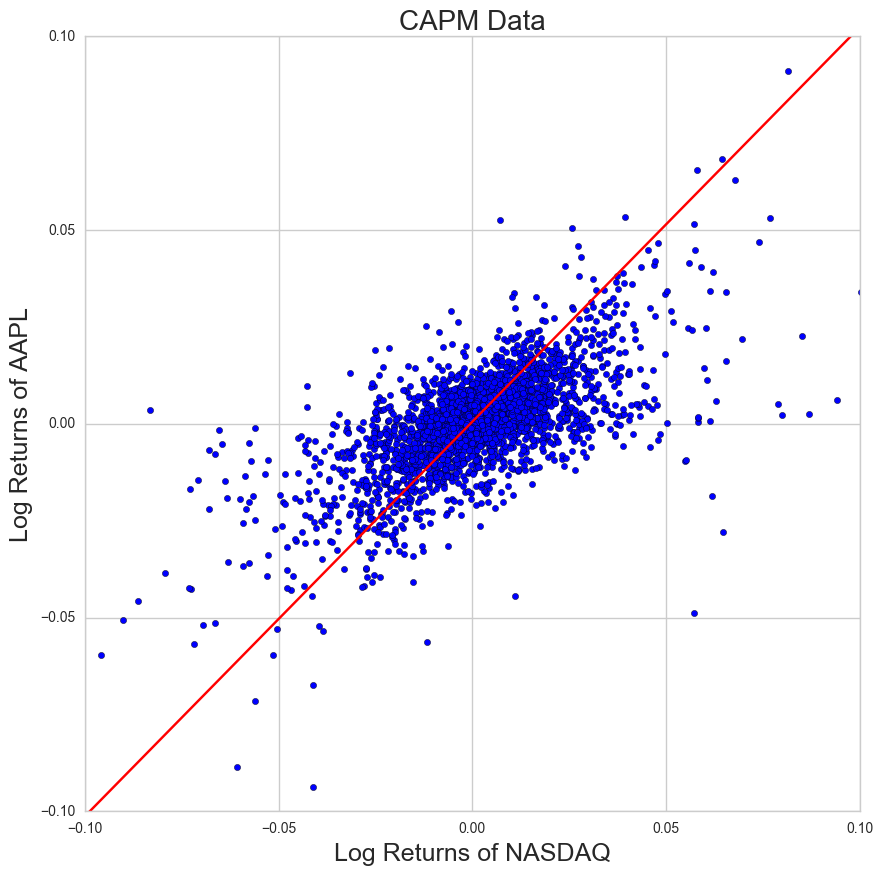

In [2]:
figure, ax = plt.subplots(figsize=(10,10))
ax.scatter(aapl_returns, nasdaq_returns)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### A predictor

In [3]:
# Suppose I was told that the daily returns on the NASDAQ were 0.01.  
# What would be my best prediction of the daily returns of AAPL?

print(mod.params['Intercept'] + mod.params['nasdaq'] * .01)

0.0107569668793


## Hypothesis Testing

With the bivariate linear model, we are interested in the general hypothesis

$H_0$ : $\beta_1=0$ or No Relationship

$H_1$ : $\beta_1 \neq 0$ or A Relationship

Z-normalized or t-stat: $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}$

$\hat\beta_1 \pm 1.96\cdot SE(\hat\beta_1)$ constitutes at 95% confidence interval in repeated samples.  If this interval includes 0, fail to reject $H_0$.

As can be seen above, these are typically produced with the regression output.

For the CAPM model specifically, we are interested in:

$H_0$ : $\alpha = 0$ and $\beta = 1$

$H_1$ : not $H_0$

As can be seen above, for AAPL, we would fail to reject $H_0$.